# análisis del precio de acciones
Se realiza el análisis de las acciones JP Morgan Chase(JP), Procter and Gamble (P&G), Apple (AAPPL) y Uniter Airlines (UAL)

In [55]:
# Importar las librerías a utilizar
import os
# Uso de imágenes
import cv2
# Manipulación de datos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Montar el servicio de almacenamiento de drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploración del conjunto de datos


### Carga de datos y exploración general

In [56]:
# Cargar contenido de los dos archivos
dfPrices = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/stocks_daily_prices.csv')
dfStocks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/stocks_daily_returns.csv')


In [ ]:
# Mostrar información del data set, listado de columnas y tipos
print('Información data set dfPrices')
dfPrices.info()
print('Información data set dfStocks')
dfStocks.info()


Información data set dfPrices
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3642 non-null   object 
 1   AAPL    3642 non-null   float64
 2   JPM     3642 non-null   float64
 3   PG      3642 non-null   float64
 4   UAL     3642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 142.4+ KB
Información data set dfStocks
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3642 non-null   object 
 1   AAPL    3642 non-null   float64
 2   JPM     3642 non-null   float64
 3   PG      3642 non-null   float64
 4   UAL     3642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 142.4+ KB


### Exploración de precios

In [ ]:
dfPrices.head(10)

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,5.949703,29.448614,47.058838,29.915234
1,1/3/2008,5.952452,29.246094,47.058838,29.690800
2,1/4/2008,5.498071,28.582682,46.870098,31.000002
3,1/7/2008,5.424478,28.868999,47.175980,29.180000
4,1/8/2008,5.229351,27.723747,47.299629,24.389999
5,1/9/2008,5.478222,28.114801,47.208511,26.030001
6,1/10/2008,5.436081,28.862019,47.169464,32.189999
7,1/11/2008,5.273324,28.533800,45.672649,32.070000
8,1/14/2008,5.459290,28.882969,45.744232,32.930000
9,1/15/2008,5.161868,27.353619,45.360241,34.570000


In [ ]:
dfPrices.tail(10)

,Date,AAPL,JPM,PG,UAL
3632,6/6/2022,146.139999,129.729996,145.320007,44.759998
3633,6/7/2022,148.710007,130.070007,146.940002,46.450001
3634,6/8/2022,147.960007,128.000000,145.110001,44.599998
3635,6/9/2022,142.639999,125.309998,142.490005,42.700001
3636,6/10/2022,137.130005,119.550003,141.949997,41.160000
3637,6/13/2022,131.880005,115.989998,138.149994,37.020000
3638,6/14/2022,132.759995,114.059998,133.839996,36.990002
3639,6/15/2022,135.429993,115.410004,132.509995,37.889999
3640,6/16/2022,130.059998,113.430000,133.320007,34.779999
3641,6/17/2022,131.559998,113.029999,132.360001,36.279999


In [ ]:
# Mostrar cantidad de celdas nulas por columna
dfPrices.isnull().sum()


,0
Date,0
AAPL,0
JPM,0
PG,0
UAL,0


### Exploración de retornos

In [ ]:
dfStocks.head(10)

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,0.000000,0.000000,0.000000,0.000000
1,1/3/2008,0.046203,-0.687708,0.000000,-0.750233
2,1/4/2008,-7.633517,-2.268378,-0.401072,4.409454
3,1/7/2008,-1.338518,1.001718,0.652615,-5.870973
4,1/8/2008,-3.597157,-3.967066,0.262103,-16.415356
5,1/9/2008,4.759115,1.410539,-0.192640,6.724073
6,1/10/2008,-0.769237,2.657736,-0.082712,23.664993
7,1/11/2008,-2.994012,-1.137199,-3.173271,-0.372783
8,1/14/2008,3.526524,1.223702,0.156730,2.681636
9,1/15/2008,-5.447997,-5.294990,-0.839431,4.980259


In [ ]:
dfStocks.tail(10)

,Date,AAPL,JPM,PG,UAL
3632,6/6/2022,0.522764,-0.330369,-0.390700,0.742737
3633,6/7/2022,1.758593,0.262092,1.114778,3.775698
3634,6/8/2022,-0.504337,-1.591456,-1.245407,-3.982782
3635,6/9/2022,-3.595571,-2.101564,-1.805523,-4.260085
3636,6/10/2022,-3.862868,-4.596596,-0.378980,-3.606559
3637,6/13/2022,-3.828484,-2.977838,-2.677001,-10.058308
3638,6/14/2022,0.667265,-1.663937,-3.119796,-0.081034
3639,6/15/2022,2.011147,1.183593,-0.993725,2.433084
3640,6/16/2022,-3.965145,-1.715625,0.611284,-8.207972
3641,6/17/2022,1.153314,-0.352642,-0.720077,4.312824


In [ ]:
dfStocks.isnull().sum()

,0
Date,0
AAPL,0
JPM,0
PG,0
UAL,0


# Graficar conjuntos de datos
Se muestran distintos tipos de gráficos tomando como punto variable independiente al tiempo.

Con Matplotlib, representa diagramas de líneas que muestren los precios diarios de las 4 acciones en una sola cifra.

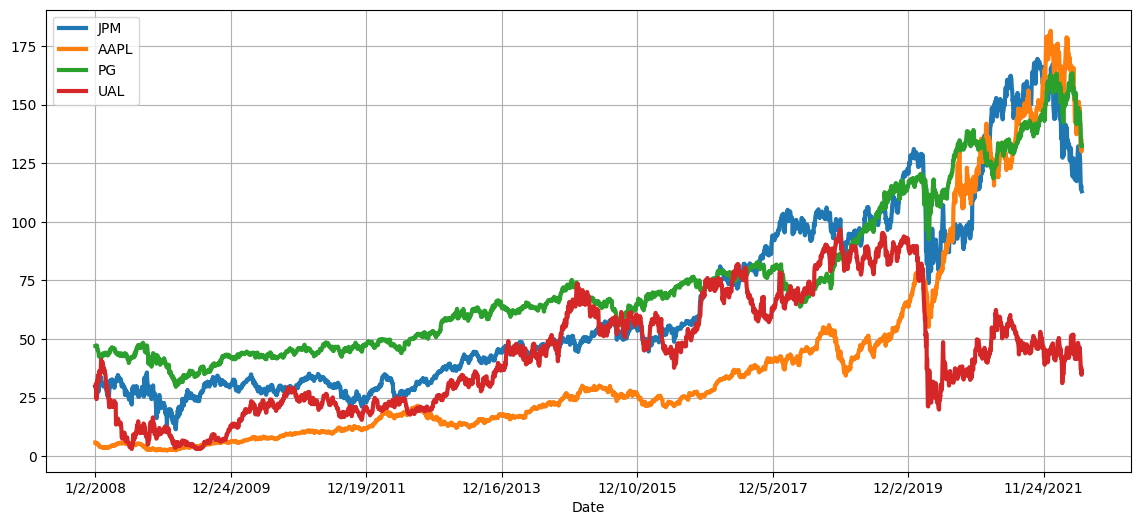

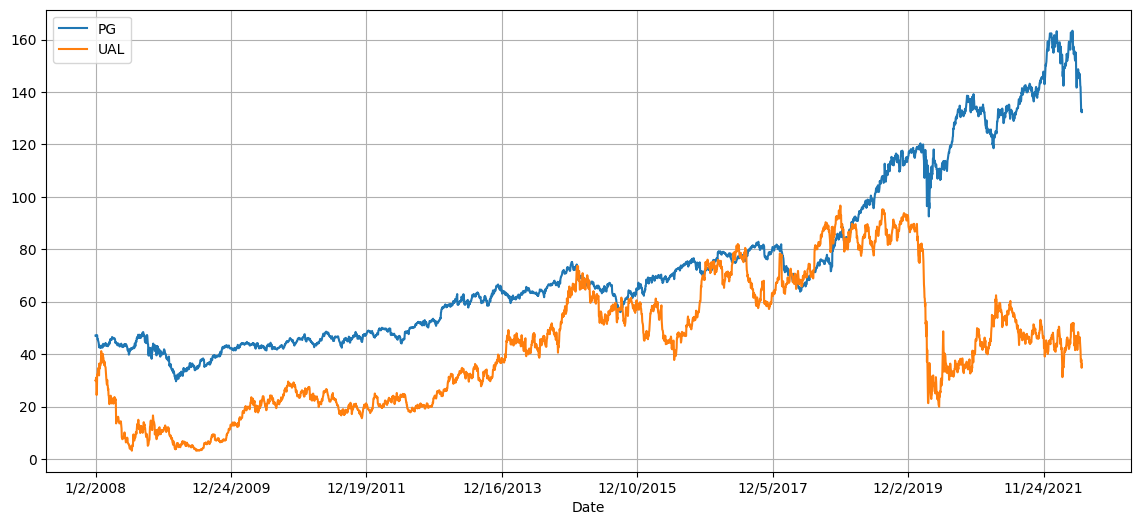

In [86]:
# Gráfico de líneas
dfPrices.plot(x='Date', y=['JPM','AAPL','PG','UAL'], kind='line', linewidth=3, figsize=(14,6))
plt.grid()
dfPrices.plot(x='Date', y=['PG','UAL'], kind='line', figsize=(14,6))
plt.grid()

Con Matplotlib, representa 4 precios diarios de acciones en varias suplots.

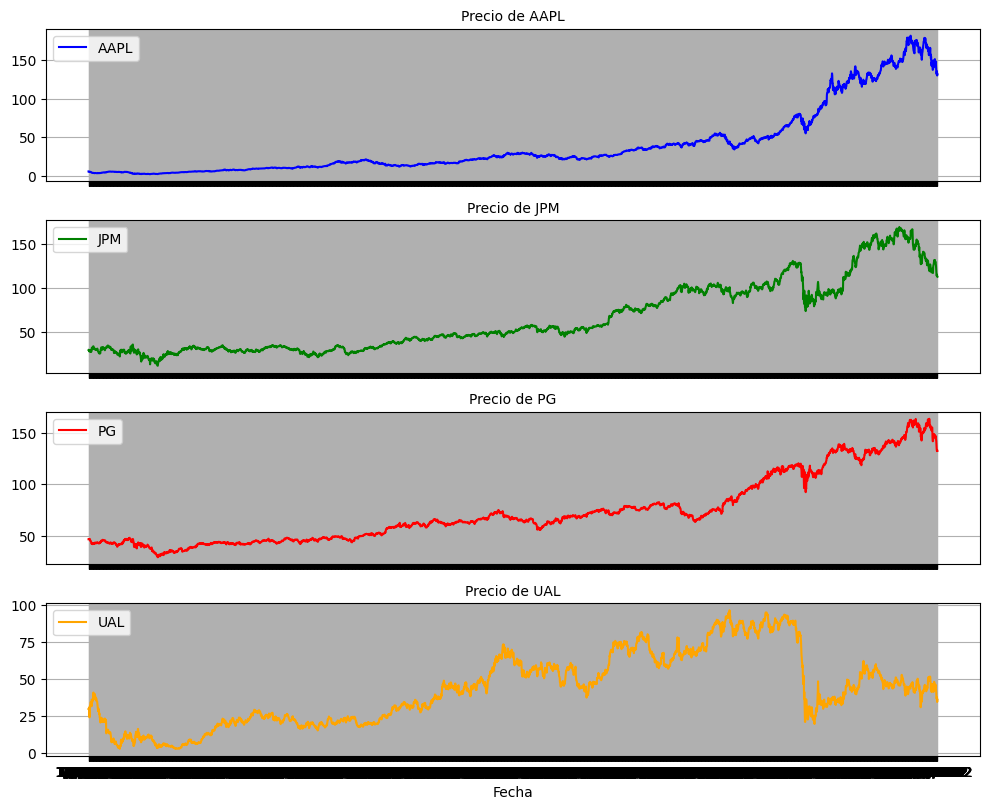

In [60]:
# representar 4 precios diarios de acciones en varias subplots
# Configuración de las figuras y subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Títulos para cada subplot
acciones = ["AAPL", "JPM", "PG", "UAL"]
colors = ["blue", "green", "red", "orange"]

# Graficar cada acción en un subplot
for i, accion in enumerate(acciones):
    axs[i].plot(dfPrices["Date"], dfPrices[accion], color=colors[i], label=accion)
    axs[i].set_title(f"Precio de {accion}", fontsize=10)
    axs[i].legend(loc="upper left")
    axs[i].grid()

# Ajustar diseño
plt.tight_layout()
plt.xlabel("Fecha")
plt.show()

Usando Matplotlib, representa los 4 plots en subplots una al lado de la otra (todas las figuras en una fila).

### Gráfico de precios respecto al tiempo

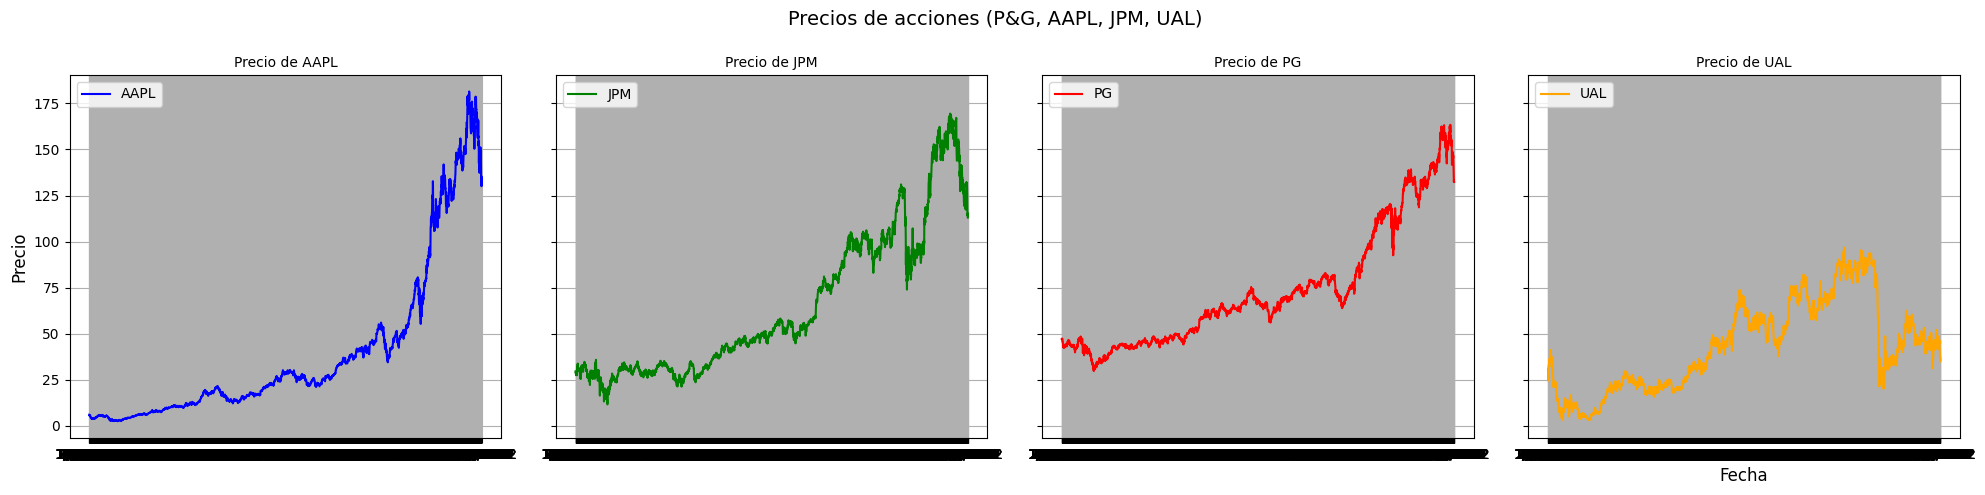

In [66]:
# Configuración de las figuras y subplots (1 fila, 4 columnas)
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Títulos para cada subplot
acciones = ["AAPL", "JPM", "PG", "UAL"]
colors = ["blue", "green", "red", "orange"]

# Graficar cada acción en un subplot
for i, accion in enumerate(acciones):
    axs[i].plot(dfPrices["Date"], dfPrices[accion], color=colors[i], label=accion)
    axs[i].set_title(f"Precio de {accion}", fontsize=10)
    axs[i].legend(loc="upper left")
    axs[i].grid()

# Etiquetas de ejes
plt.suptitle("Precios de acciones (P&G, AAPL, JPM, UAL)", fontsize=14)  # Título general
plt.xlabel("Fecha", fontsize=12)
axs[0].set_ylabel("Precio", fontsize=12)  # Etiqueta compartida para el eje y

# Ajustar diseño
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajuste para el título general
plt.show()

### Gráfico de retornos respecto al tiempo
Se muestran los datos del último año para contar con una visualización más detallada y limpia.

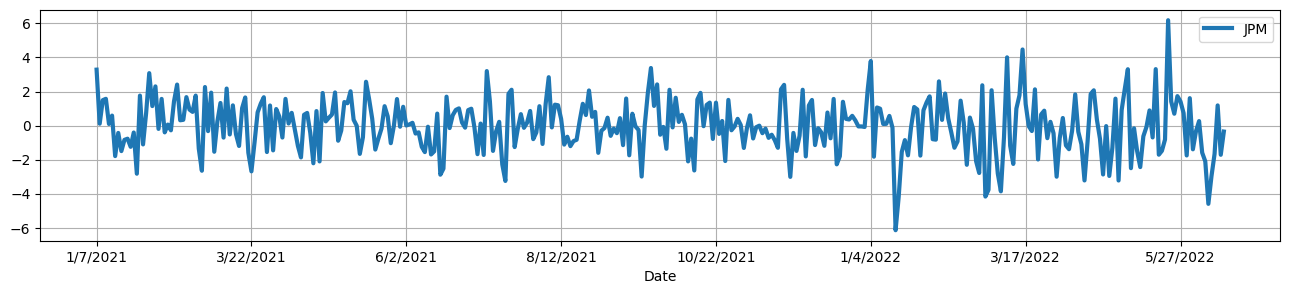

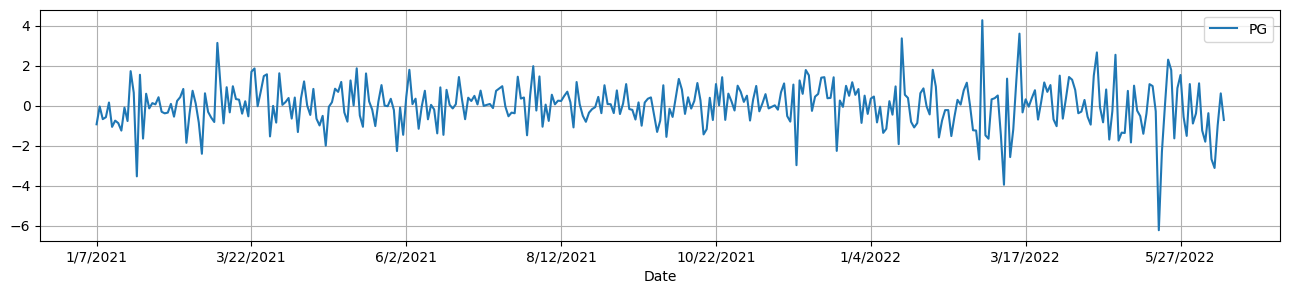

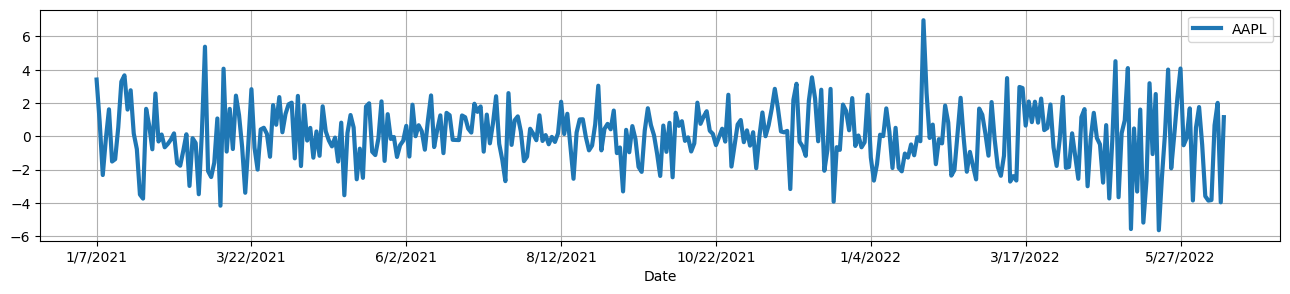

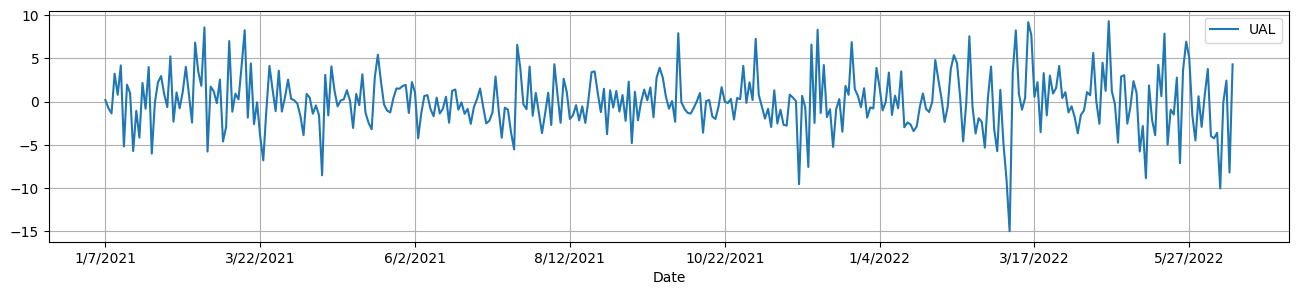

In [ ]:
# Graficar a manera de líneas el data set de retornos, mostrar un gráfico en un mosaico de cuatro secciones
dfStocks.tail(365).plot(x='Date', y=['JPM'], kind='line', linewidth=3, figsize=(16,3))
plt.grid()
dfStocks.tail(365).plot(x='Date', y=['PG'], kind='line', figsize=(16,3))
plt.grid()

dfStocks.tail(365).plot(x='Date', y=['AAPL'], kind='line', linewidth=3, figsize=(16,3))
plt.grid()
dfStocks.tail(365).plot(x='Date', y=['UAL'], kind='line', figsize=(16,3))
plt.grid()

### Disperción precio acción vs acción

Con Matplotlib, representa el diagrama de dispersión entre los rendimientos diarios de Apple y JP Morgan.

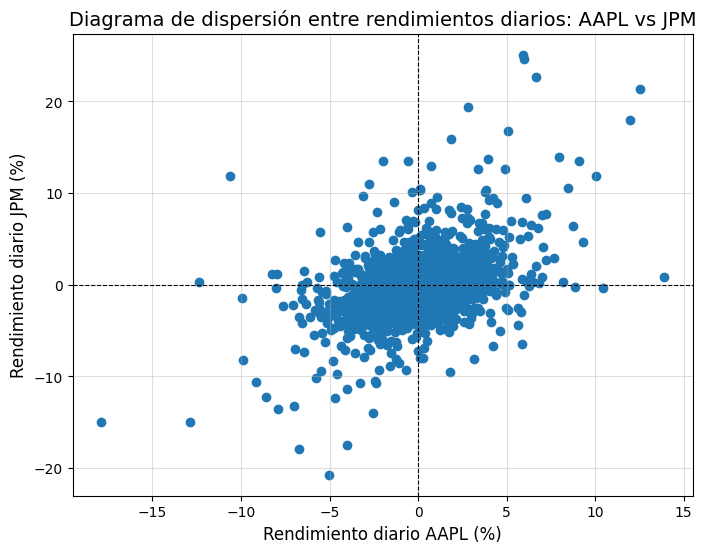

In [63]:
# Convertir la columna Date a formato datetime
dfStocks["Date"] = pd.to_datetime(dfStocks["Date"])

# Crear el diagrama de dispersión entre rendimientos de AAPL y JPM
plt.figure(figsize=(8, 6))
plt.scatter(dfStocks['AAPL'], dfStocks['JPM'])

# Etiquetas y título
plt.title("Diagrama de dispersión entre rendimientos diarios: AAPL vs JPM", fontsize=14)
plt.xlabel("Rendimiento diario AAPL (%)", fontsize=12)
plt.ylabel("Rendimiento diario JPM (%)", fontsize=12)
plt.grid(alpha=0.4)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea vertical en x=0
plt.show()

 Utilizando Seaborn, representa un diagrama de dispersión similar entre los rendimientos diarios de Apple y JP Morgan.

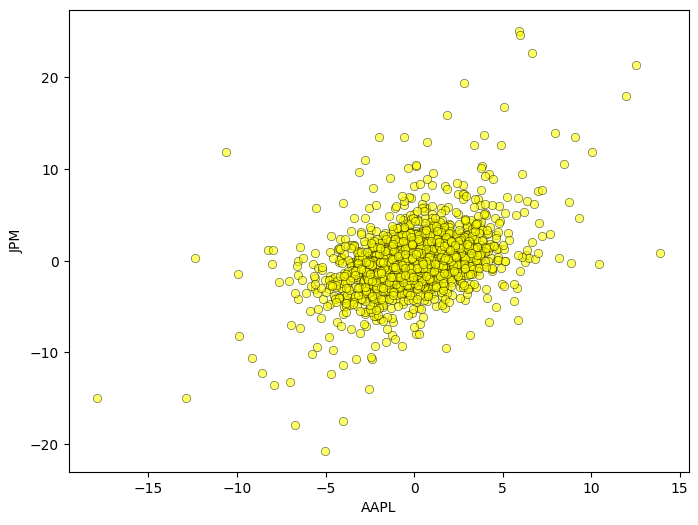

In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=dfStocks,
    x="AAPL",
    y="JPM",
    color="yellow",
    alpha=0.6,
    edgecolor="black"
)

plt.show()

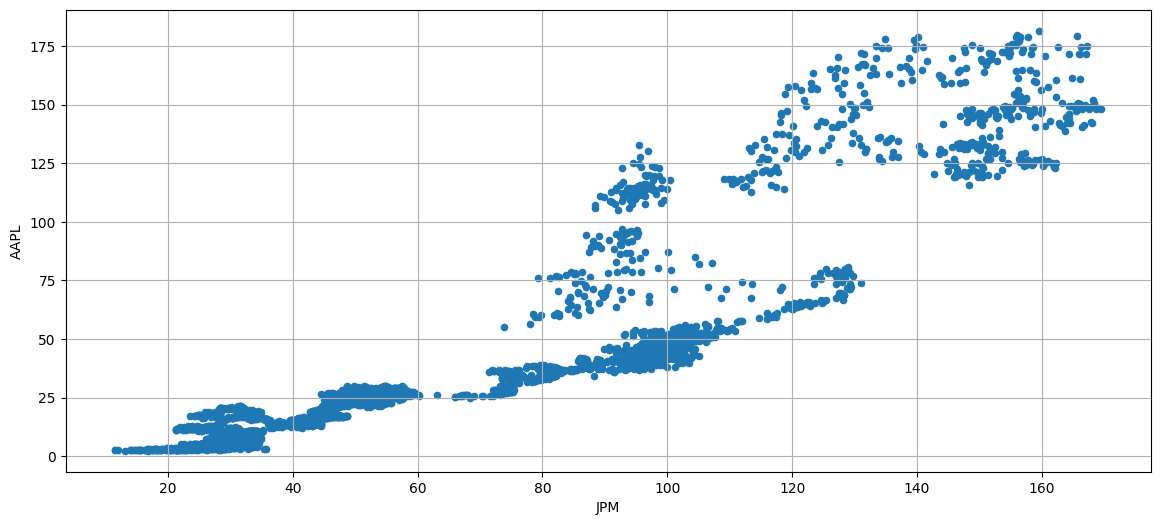

In [ ]:
# Gráfico de dispersión comparando precio apple vs p&g
dfPrices.plot(x='JPM', y='AAPL', kind='scatter', figsize=(14,6))
plt.grid()

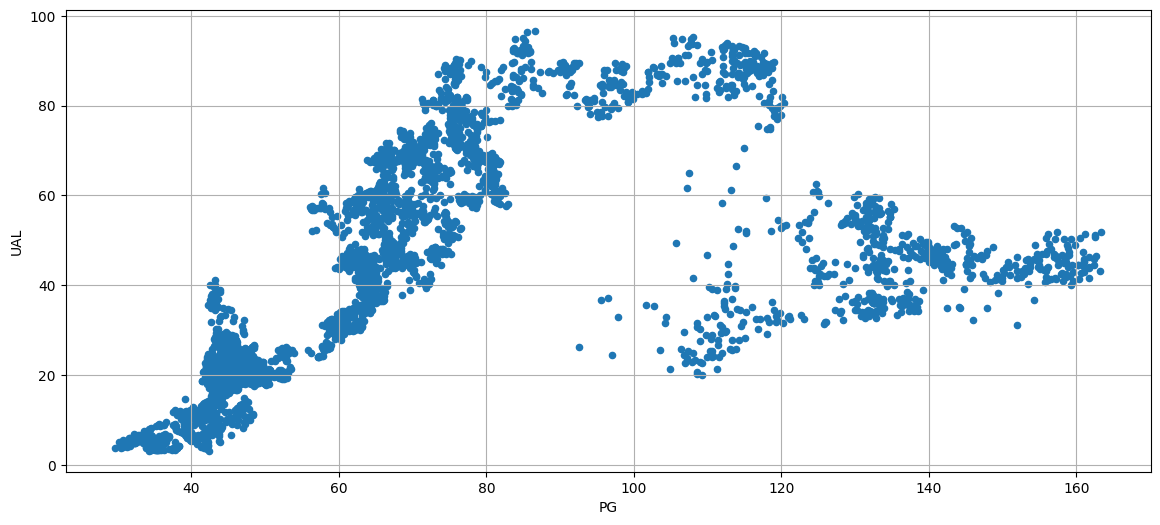

In [ ]:
# Grafico de dispersión de las acciones PG,UAL
dfPrices.plot(x='PG', y='UAL', kind='scatter', figsize=(14,6))
plt.grid()

### Disperción por retornos acción vc acción

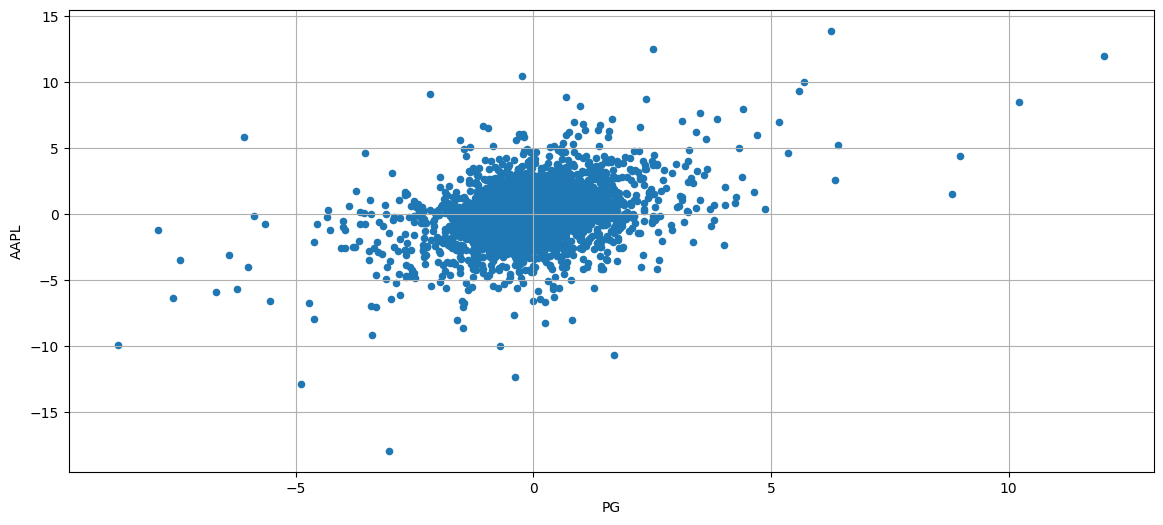

In [ ]:
# Grafico de dispersión retornos stock PG vs AAPL
dfStocks.plot(x='PG', y='AAPL', kind='scatter', figsize=(14,6))
plt.grid()

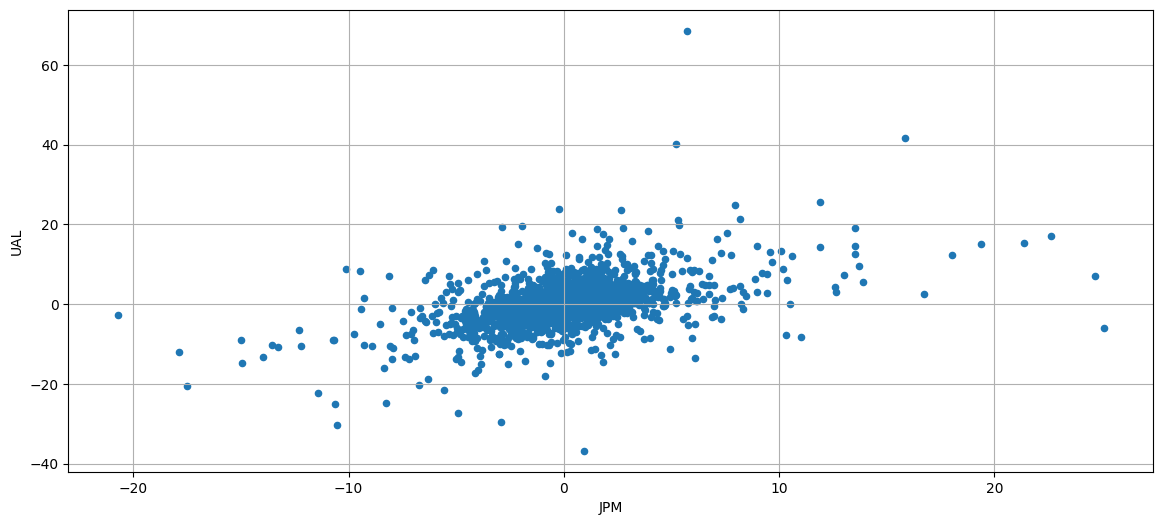

In [ ]:
# Gráfico de dispersión retornos jpm vs ual
dfStocks.plot(x='JPM', y='UAL', kind='scatter', figsize=(14,6))
plt.grid()

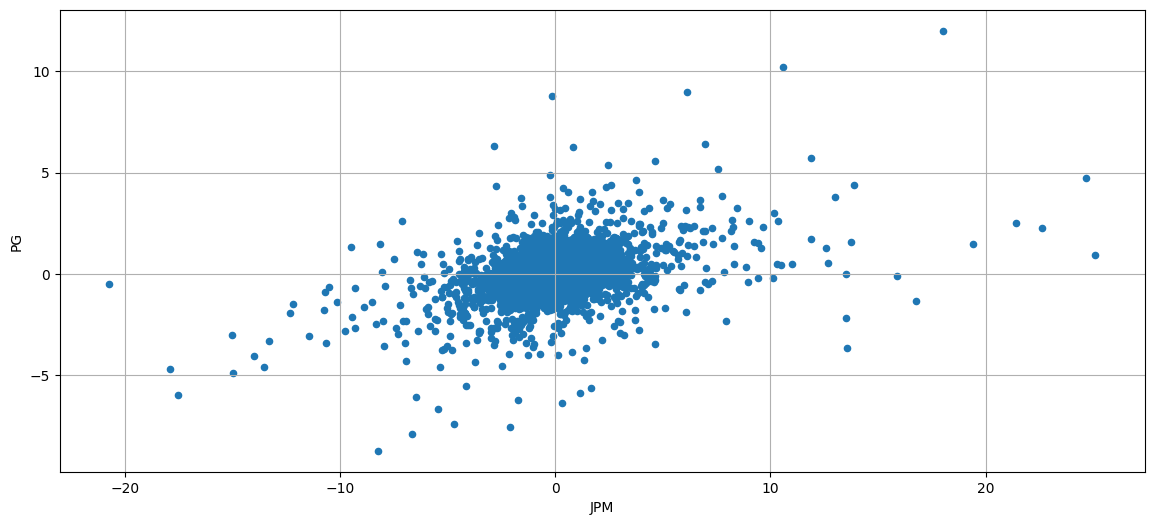

In [ ]:
# Grafico dispersión jpm vs pg
dfStocks.plot(x='JPM', y='PG', kind='scatter', figsize=(14,6))
plt.grid()

## Gráfico de barras
Supon que decides volverse alcista sobre AAPL y asignas el 70% de sus activos. También decides dividir en partes iguales el resto de sus activos en otras acciones (JPM, PG y UAL). Con Matplotlib, representa un gráfico circular que muestre estas asignaciones. Utiliza el atributo 'explode' para aumentar la separación entre AAPL y el resto de la cartera.

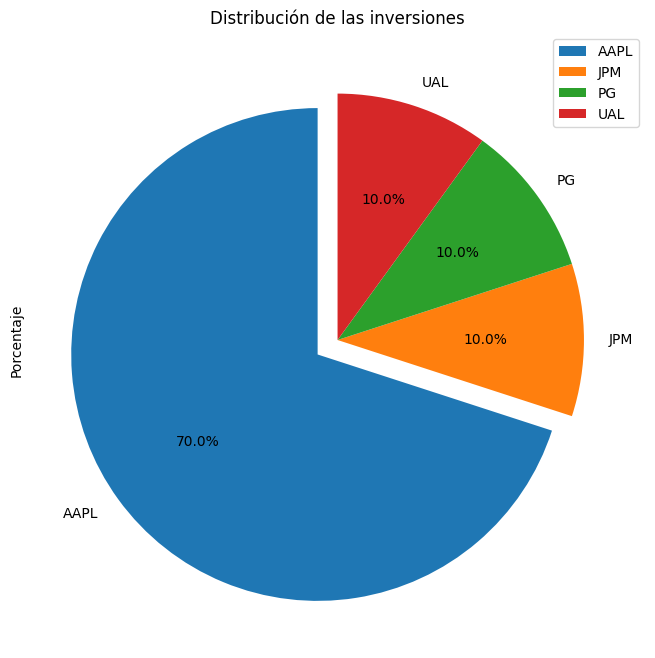

In [75]:
# Asignar en un array la distribución de las inversiones
acciones = ['AAPL', 'JPM', 'PG', 'UAL']
porcentajes = [70, 10, 10, 10]  # AAPL: 70%, las otras tres: 10% cada una

explode = [0.1, 0, 0, 0]  # AAPL se separa del resto

# Crear el gráfico circular
df = pd.DataFrame(data={'Porcentaje': porcentajes}, index=acciones)
#df.plot(kind='pie', y='Porcentaje', figsize=(8, 8), autopct='%1.1f%%', startangle=90, explode=explode)
df.plot.pie(y='Porcentaje', figsize=(8, 8), autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribución de las inversiones')
plt.show()

## Histogramas de acciones

### Histogramas precios de acciones
Usando Matplotlib, representa el histograma para los retornos de United Airlines y P&G usando 40 divisiones con color rojo. Muestra la media y la desviación estándar para ambas acciones en la parte superior de la figura. ¿Qué concluyes de este gráfico?

### Conclusión
Se concluye que el retorno ya sea positivo o negativo en estas inversiones es significativamente más pequeño que en cripto, por lo que para obtener ganancias altas con este tipo de acciones es neceario contar con una inversión fuerte o contar con apalancamiento. El comportamiento de los retornos es mucho más frecuente en porcentajes cercanos al 3-5 por ciento.

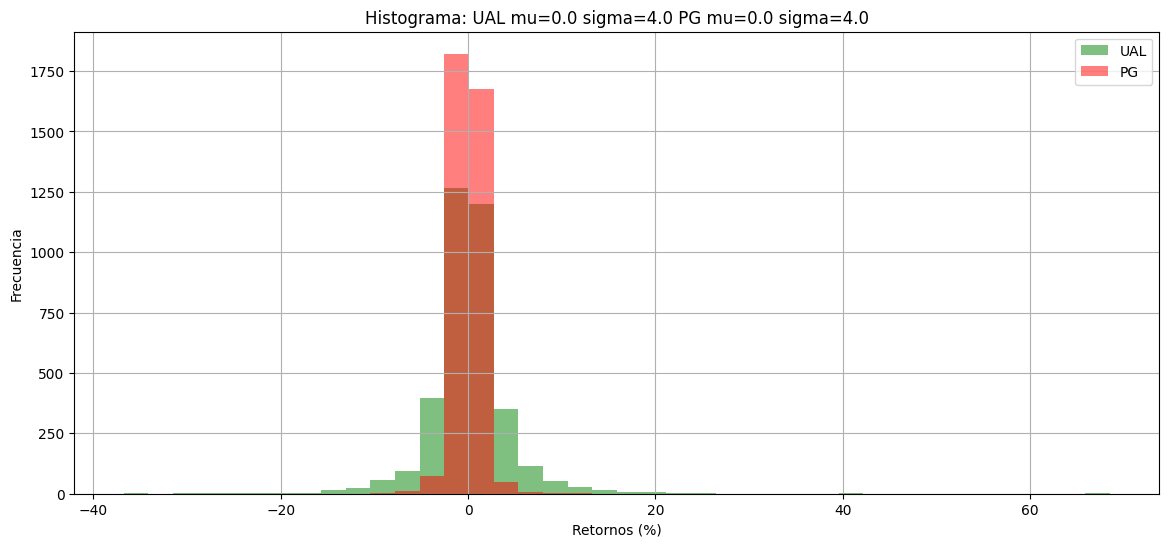

In [85]:
# Calcular número de rangos 40, para la variable UAL
mu_ual = round(dfStocks['UAL'].mean(),0)
sigma_ual = round(dfStocks['UAL'].std(),0)

mu_pg = round(dfStocks['PG'].mean(),0)
sigma_pg = round(dfStocks['PG'].std(),0)

dfStocks[['UAL', 'PG']].plot(
    kind='hist', bins=40, figsize=(14,6), alpha=0.5, color=['green','red']
)
plt.title('Histograma: UAL mu=' + str(mu_ual) + ' sigma=' + str(sigma_ual) + ' PG mu='+ str(mu_ual) + ' sigma=' + str(sigma_ual) )
plt.xlabel('Retornos (%)')
plt.ylabel('Frecuencia')
plt.grid()

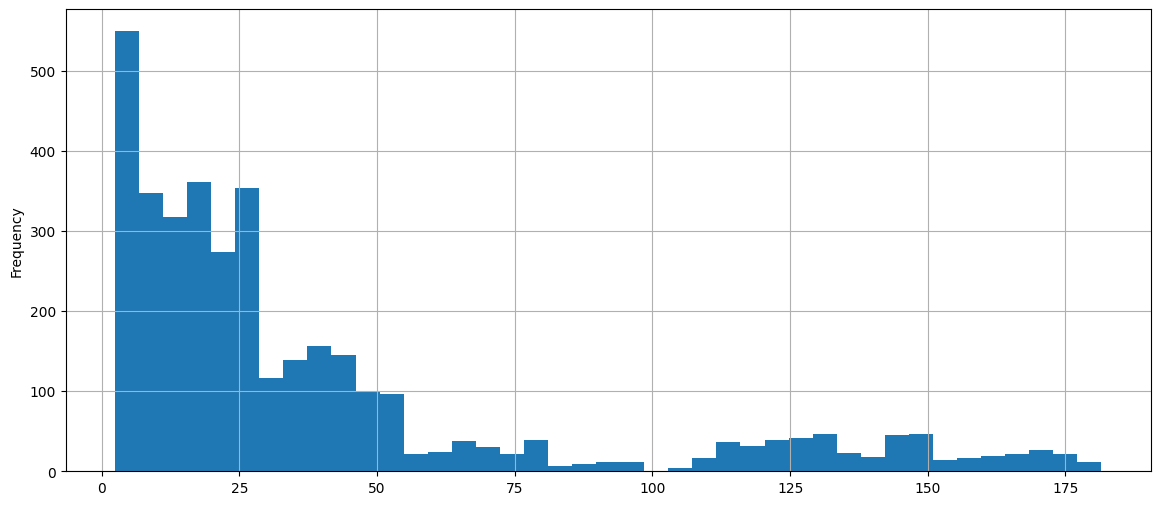

In [ ]:
# Calcular número de rangos (bins) mediante la regla de freedman diaconis para la variable apple
dfPrices['AAPL'].plot(kind='hist', bins='fd', figsize=(14,6))
plt.grid()

Cuartiles:  0.25    11.441511
0.50    23.470343
0.75    45.398705
Name: AAPL, dtype: float64
Rango intercuartil:  33.957194085000005
Número filas:  3642
Raíz cúbica:  15.385560198385317
Número de rangos:  5.0


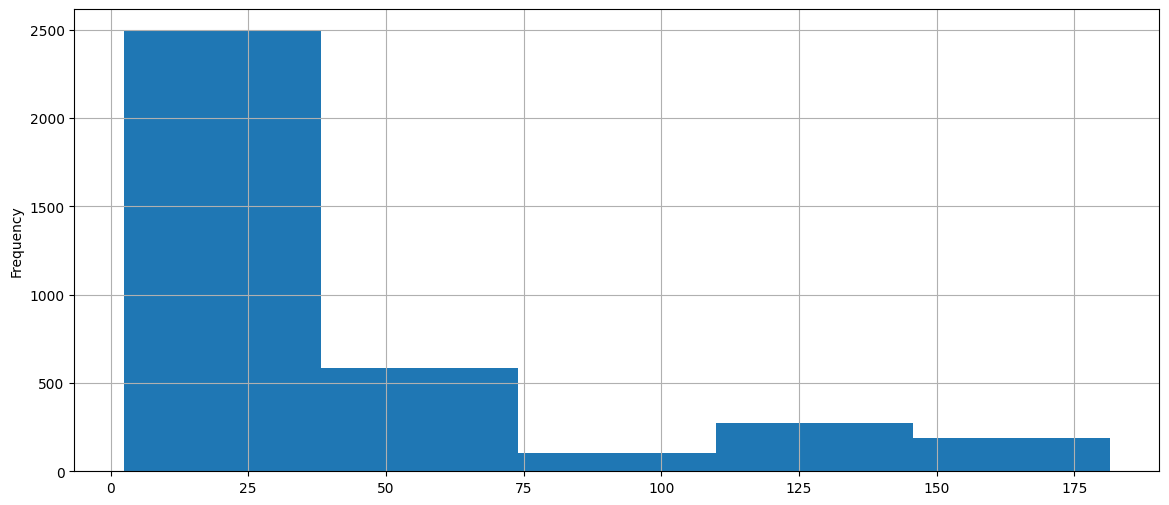

In [ ]:
# Obtener cuartiles de los datos de precio de apple
dfPrices['AAPL'].quantile([0.25,0.5,0.75])
IQR = dfPrices['AAPL'].quantile(0.75) - dfPrices['AAPL'].quantile(0.25)
h = 2 * IQR / (dfPrices.shape[0] ** (1/3))
h = np.ceil(h)

# Imprimir los cuartiles
print('Cuartiles: ', dfPrices['AAPL'].quantile([0.25,0.5,0.75]))
print('Rango intercuartil: ', IQR)
print('Número filas: ', dfPrices.shape[0] )
print('Raíz cúbica: ', dfPrices.shape[0] ** (1/3))
print('Número de rangos: ', h)

dfPrices['AAPL'].plot(kind='hist', bins=int(h), figsize=(14,6))
plt.grid()

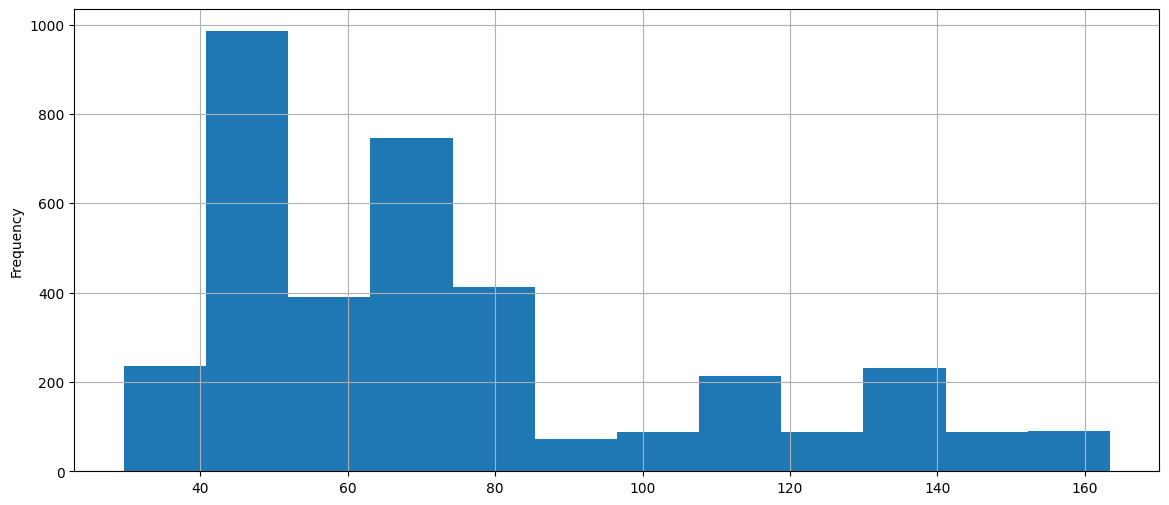

In [ ]:
# Diagrama histograma de las acciones P&G con bins mediante la regla stuges
cntBins = 1 + 3.322 * np.log10(dfPrices.shape[0])
dfPrices['PG'].plot(kind='hist', bins=int(cntBins), figsize=(14,6))
plt.grid()

### Histogramas para retornos

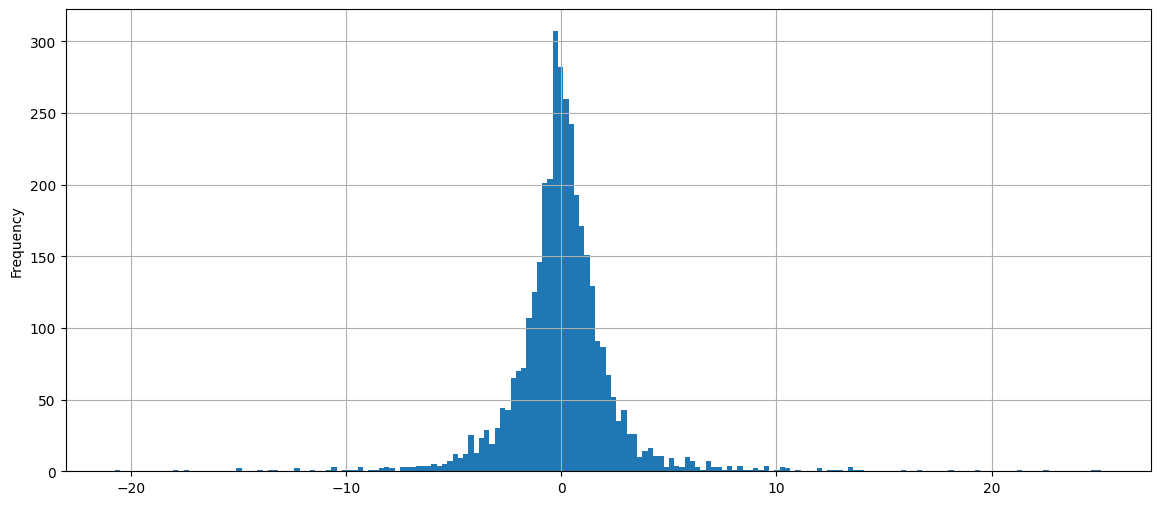

In [ ]:
# Histograma para la variable retornos stock PJM, con regla freedman diaconis
dfStocks['JPM'].plot(kind='hist', bins='fd', figsize=(14,6))
plt.grid()

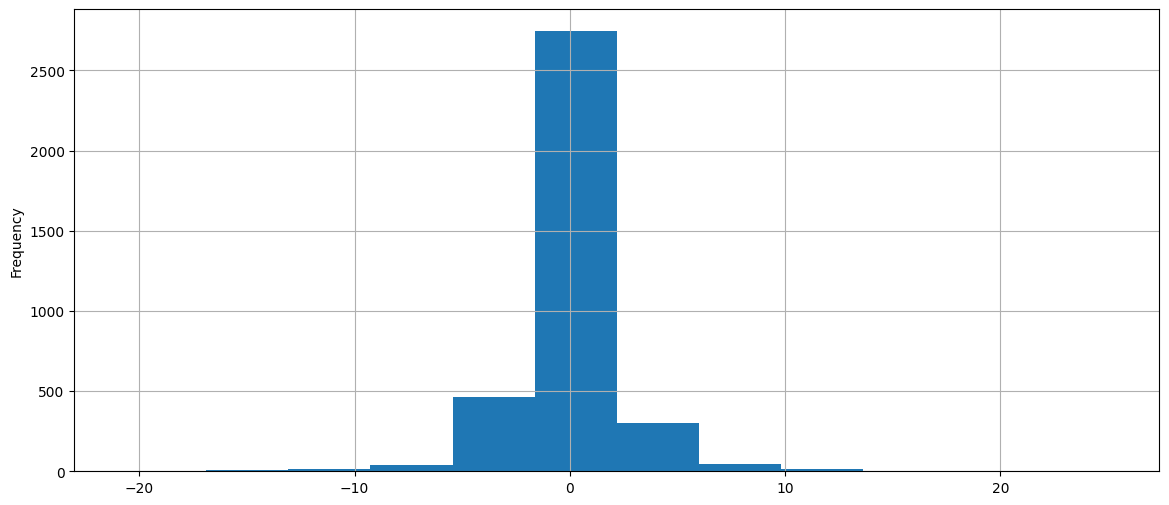

In [ ]:
# Histograma para la variable retornos stock PJM, con regla sturges
cntBins = 1 + 3.322 * np.log10(dfStocks.shape[0])
dfStocks['JPM'].plot(kind='hist', bins=int(cntBins), figsize=(14,6))
plt.grid()

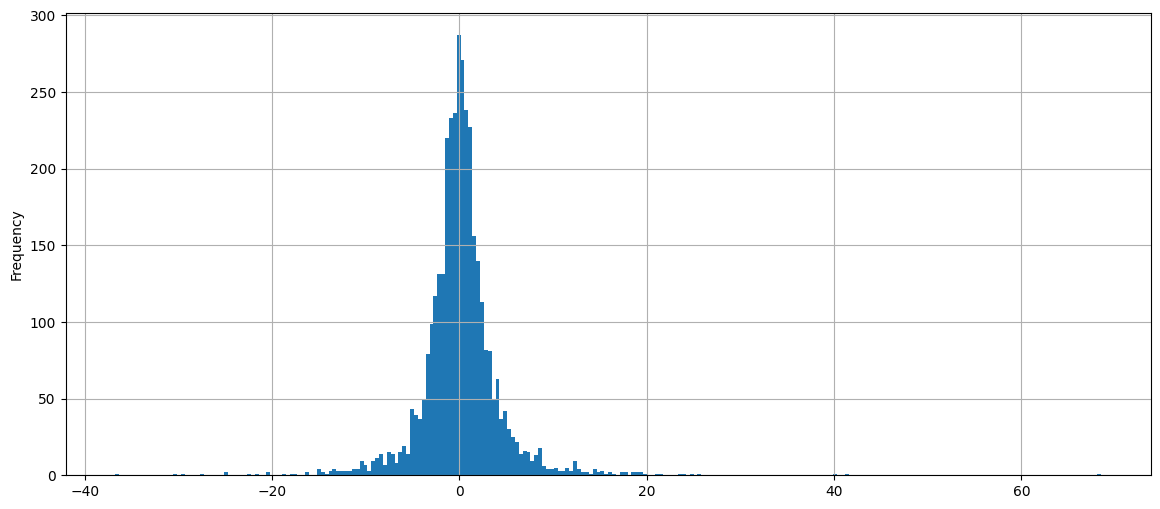

In [ ]:
# Histograma para la variable retornos stock PJM, con regla freedman diaconis
dfStocks['UAL'].plot(kind='hist', bins='fd', figsize=(14,6))
plt.grid()

## Gráficos de disperción
Se presenta inicialmnte la comparación de las acciones APPL y JPM, en el siguiente bloque se explora la comparación del crecimiento semanal de estas dos acciones.

In [ ]:
# al dataframe precios se añade columna que indica si todas las acciones subieron de precio respecto a 7 días antes

# Shift the prices by 7 days
dfPrices[['JPM_shifted', 'AAPL_shifted', 'PG_shifted', 'UAL_shifted']] = dfPrices[['JPM', 'AAPL', 'PG', 'UAL']].shift(7)

# Create a boolean column indicating if all prices increased
dfPrices['All_Prices_Increased'] = (dfPrices['JPM'] >= dfPrices['JPM_shifted']) & \
                                   (dfPrices['AAPL'] >= dfPrices['AAPL_shifted']) & \
                                   (dfPrices['PG'] >= dfPrices['PG_shifted']) & \
                                   (dfPrices['UAL'] >= dfPrices['UAL_shifted'])

# Drop the shifted columns
dfPrices = dfPrices.drop(['JPM_shifted', 'AAPL_shifted', 'PG_shifted', 'UAL_shifted'], axis=1)


### Comparación de precios entre acciones

Text(0, 0.5, 'Crecimiento semana JPM (%)')

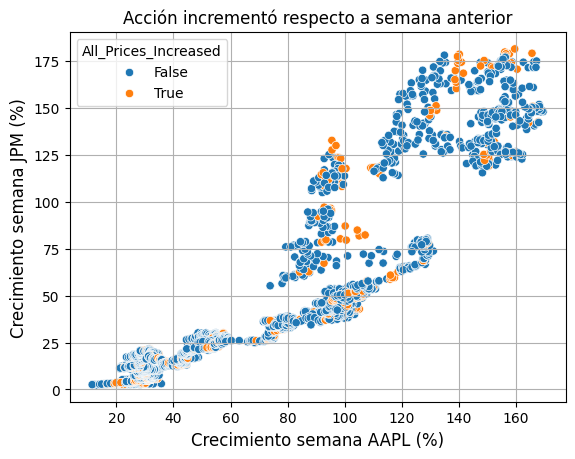

In [68]:
# Usando sns se grafica mediante dispersión la relación entre las acciones de apple y jpm
# Diferenciando los colores de los dos conjuntos
sns.scatterplot(x='JPM', y='AAPL', data=dfPrices, hue='All_Prices_Increased')
plt.grid()
plt.title('Acción incrementó respecto a semana anterior')
plt.xlabel("Crecimiento semana AAPL (%)", fontsize=12)
plt.ylabel("Crecimiento semana JPM (%)", fontsize=12)


### Comparación cambio de retornos

         Date      AAPL        JPM         PG        UAL  JPM_shifted  \
0    1/2/2008  5.949703  29.448614  47.058838  29.915234          NaN   
1    1/3/2008  5.952452  29.246094  47.058838  29.690800          NaN   
2    1/4/2008  5.498071  28.582682  46.870098  31.000002          NaN   
3    1/7/2008  5.424478  28.868999  47.175980  29.180000          NaN   
4    1/8/2008  5.229351  27.723747  47.299629  24.389999          NaN   
5    1/9/2008  5.478222  28.114801  47.208511  26.030001          NaN   
6   1/10/2008  5.436081  28.862019  47.169464  32.189999          NaN   
7   1/11/2008  5.273324  28.533800  45.672649  32.070000    29.448614   
8   1/14/2008  5.459290  28.882969  45.744232  32.930000    29.246094   
9   1/15/2008  5.161868  27.353619  45.360241  34.570000    28.582682   
10  1/16/2008  4.874823  28.931847  45.026695  34.639999    28.868999   
11  1/17/2008  4.912993  27.961170  44.523041  33.419998    27.723747   
12  1/18/2008  4.927347  27.646917  43.921303  32.9

Text(0.5, 1.0, 'Acción incrementó respecto a semana anterior')

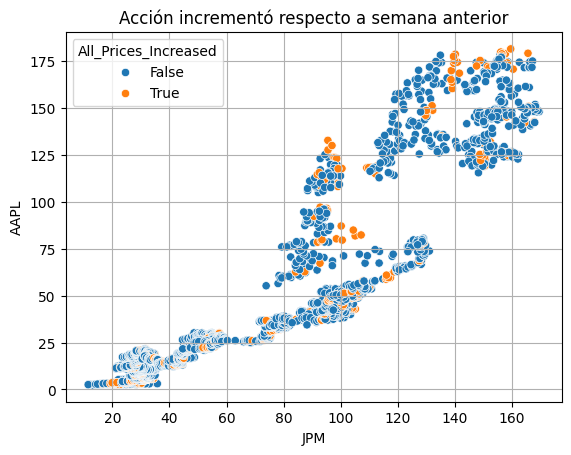

In [58]:
# al dataframe precios se añade columna que indica si todas las acciones subieron de precio respecto a 7 días antes

# Shift the prices by 7 days
dfPrices[['JPM_shifted', 'AAPL_shifted', 'PG_shifted', 'UAL_shifted']] = dfPrices[['JPM', 'AAPL', 'PG', 'UAL']].shift(7)

print(dfPrices.head(30))

# Create a boolean column indicating if all prices increased
dfPrices['All_Prices_Increased'] = (dfPrices['JPM'] >= dfPrices['JPM_shifted']) & \
                                   (dfPrices['AAPL'] >= dfPrices['AAPL_shifted']) & \
                                   (dfPrices['PG'] >= dfPrices['PG_shifted']) & \
                                   (dfPrices['UAL'] >= dfPrices['UAL_shifted'])

# Drop the shifted columns
dfPrices = dfPrices.drop(['JPM_shifted', 'AAPL_shifted', 'PG_shifted', 'UAL_shifted'], axis=1)

# Usando sns se grafica mediante dispersión la relación entre las acciones de apple y jpm
# Diferenciando los colores de los dos conjuntos
sns.scatterplot(x='JPM', y='AAPL', data=dfPrices, hue='All_Prices_Increased')
plt.grid()
plt.title('Acción incrementó respecto a semana anterior')

### Gráfico de paridad

In [ ]:
# cración de nueva variable
# medir el crecimiento respecto a la semana anterior, el valor resultante de este delta
#

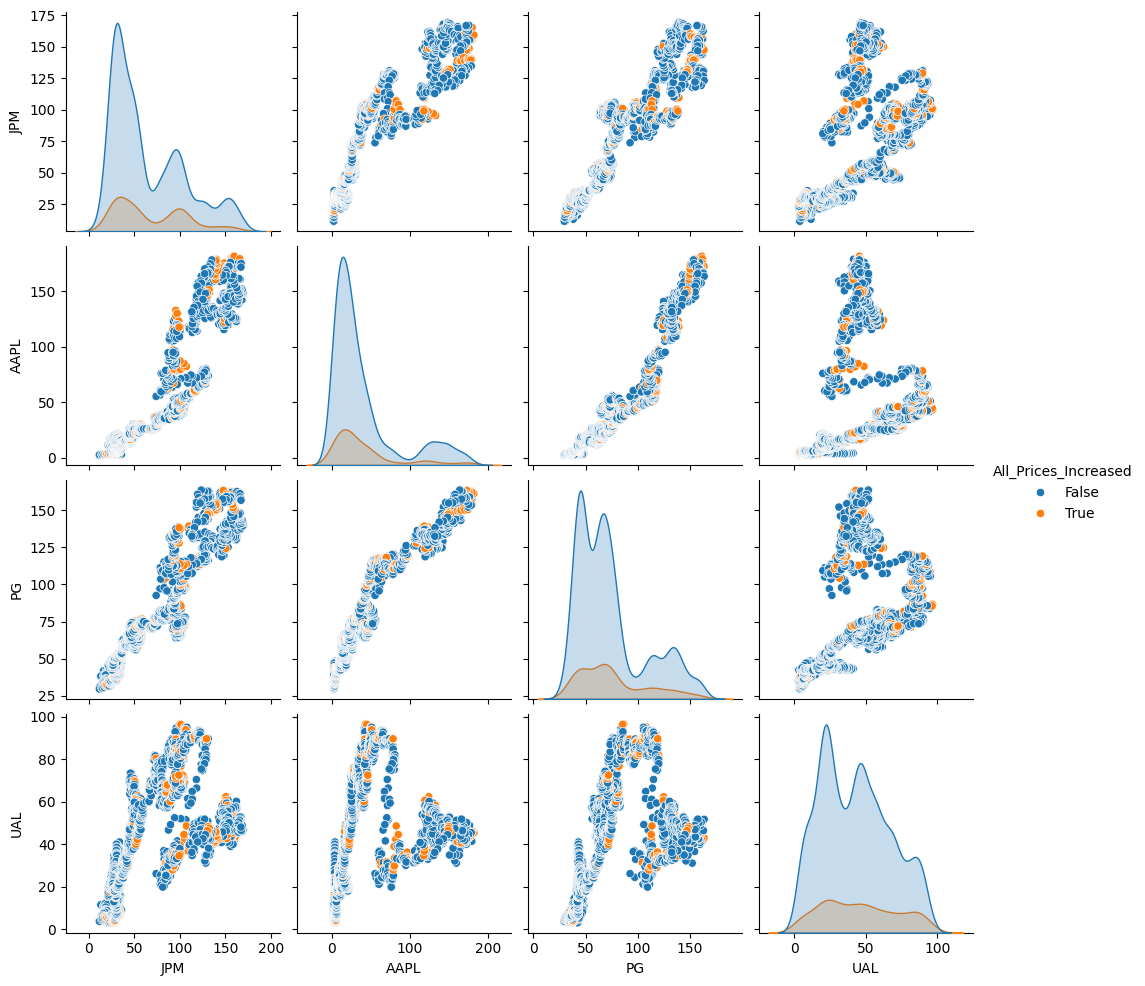

In [59]:
# Graficar comparación de pares con sns para todas las acciones
sns.pairplot(dfPrices, hue='All_Prices_Increased', vars=['JPM', 'AAPL', 'PG', 'UAL'])

### Gráfico mapa de calor
 Con Seaborn, representa un mapa de calor que muestre las correlaciones entre los rendimientos diarios de las acciones. Comente la correlación entre UAL y P&G.


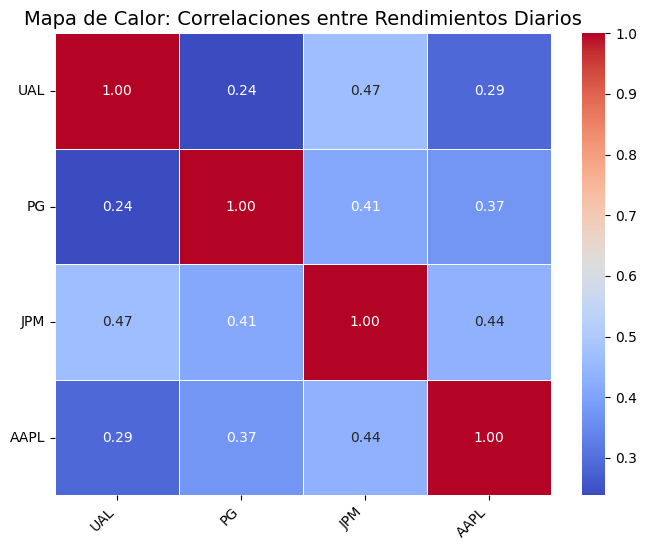

In [92]:
# Calcular la matriz de correlación
correlaciones = dfStocks[['UAL', 'PG','JPM','AAPL']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlaciones,
    annot=True,          # Mostrar valores numéricos
    cmap="coolwarm",     # Colores del mapa de calor
    fmt=".2f",           # Formato de los números
    linewidths=0.5,      # Separación entre celdas
    cbar=True            # Mostrar la barra de color
)

# Títulos y etiquetas
plt.title("Mapa de Calor: Correlaciones entre Rendimientos Diarios", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()